This notebook is meant to be viewed as a [RISE](https://github.com/damianavila/RISE) slideshow. When run, a custom stylesheet will be applied:
* *italic* text will be shown in *blue*,
* **bold** text will be showin in **red**, and
* ~~strikethrough~~ text will be shown in ~~green~~.

The code below is meant to be run before the presentation to ensure that Sage and its dependencies are properly initialized, so no waiting is required during the presentation.

In [ ]:
import drg
p = [[[1, 0, 0, 0], [0, 6, 0, 0], [0, 0, 3, 0], [0, 0, 0, 6]],
     [[0, 1, 0, 0], [1, 2, 1, 2], [0, 1, 0, 2], [0, 2, 2, 2]],
     [[0, 0, 1, 0], [0, 2, 0, 4], [1, 0, 2, 0], [0, 4, 0, 2]],
     [[0, 0, 0, 1], [0, 2, 2, 2], [0, 2, 0, 1], [1, 2, 1, 2]]]
scheme = drg.ASParameters(p)
scheme.kreinParameters()

# Computing distance-regular graph and association scheme parameters in SageMath with [`sage-drg`](https://github.com/jaanos/sage-drg)

### Janoš Vidali
#### University of Ljubljana

Based on joint work with <b>Alexander Gavrilyuk</b>, <b>Aleksandar Jurišić</b>, <b>Sho Suda</b> and <b>Jason Williford</b>

[Live slides](https://mybinder.org/v2/gh/jaanos/sage-drg/master?filepath=jupyter/2021-06-14-agtsem/AGTSem-sage-drg.ipynb) on [Binder](https://mybinder.org)

https://github.com/jaanos/sage-drg

## Association schemes

* **Association schemes** were defined by *Bose* and *Shimamoto* in *1952* as a theory underlying **experimental design**.
* They provide a ~~unified approach~~ to many topics, such as
  - *combinatorial designs*,
  - *coding theory*,
  - generalizing *groups*, and
  - *strongly regular* and *distance-regular graphs*.

## Examples

* *Hamming schemes*: **$X = \mathbb{Z}_n^d$**, **$x \ R_i \ y \Leftrightarrow \operatorname{weight}(x-y) = i$**
* *Johnson schemes*: **$X = \{S \subseteq \mathbb{Z}_n \mid |S| = d\}$** ($2d \le n$), **$x \ R_i \ y \Leftrightarrow |x \cap y| = d-i$**

<center><img src="as.png" /></center>

## Definition

* Let **$X$** be a set of *vertices* and **$\mathcal{R} = \{R_0 = \operatorname{id}_X, R_1, \dots, R_D\}$** a set of *symmetric relations* partitioning *$X^2$*.

* **$(X, \mathcal{R})$** is said to be a **$D$-class association scheme** if there exist numbers **$p^h_{ij}$** ($0 \le h, i, j \le D$) such that, for any *$x, y \in X$*,
  **$$
  x \ R_h \ y \Rightarrow |\{z \in X \mid x \ R_i \ z \ R_j \ y\}| = p^h_{ij}
  $$**

* We call the numbers **$p^h_{ij}$** ($0 \le h, i, j \le D$) **intersection numbers**.

## Main problem

* Does an association scheme with given parameters ~~exist~~?
  - If so, is it ~~unique~~?
  - Can we determine ~~all~~ such schemes?
* ~~Lists~~ of feasible parameter sets have been compiled for [**strongly regular**](https://www.win.tue.nl/~aeb/graphs/srg/srgtab.html) and [**distance-regular graphs**](https://www.win.tue.nl/~aeb/drg/drgtables.html).
* Recently, lists have also been compiled for some [**$Q$-polynomial association schemes**](http://www.uwyo.edu/jwilliford/).
* Computer software allows us to *efficiently* compute parameters and check for *existence conditions*, and also to obtain new information which would be helpful in the ~~construction~~ of new examples.

## Bose-Mesner algebra

* Let **$A_i$** be the *binary matrix* corresponding to the relation *$R_i$* ($0 \le i \le D$).

* The vector space **$\mathcal{M}$** over *$\mathbb{R}$* spanned by *$A_i$* ($0 \le i \le D$) is called the **Bose-Mesner algebra**.

* *$\mathcal{M}$* has a second basis ~~$\{E_0, E_1, \dots, E_D\}$~~ consisting of *projectors* to the *common eigenspaces* of *$A_i$* ($0 \le i \le D$).

* There exist the **eigenmatrix** ~~$P$~~ and the **dual eigenmatrix** ~~$Q$~~ such that
  *$$
  A_j = \sum_{i=0}^D P_{ij} E_i, \qquad E_j = {1 \over |X|} \sum_{i=0}^D Q_{ij} A_i.
  $$*

* There are ~~nonnegative~~ constants **$q^h_{ij}$**, called **Krein parameters**, such that
  **$$
  E_i \circ E_j = {1 \over |X|} \sum_{h=0}^D q^h_{ij} E_h ,
  $$**
  where **$\circ$** is the *entrywise matrix product*.

## Parameter computation: general association schemes

In [2]:
%display latex
import drg
p = [[[1, 0, 0, 0], [0, 6, 0, 0], [0, 0, 3, 0], [0, 0, 0, 6]],
     [[0, 1, 0, 0], [1, 2, 1, 2], [0, 1, 0, 2], [0, 2, 2, 2]],
     [[0, 0, 1, 0], [0, 2, 0, 4], [1, 0, 2, 0], [0, 4, 0, 2]],
     [[0, 0, 0, 1], [0, 2, 2, 2], [0, 2, 0, 1], [1, 2, 1, 2]]]
scheme = drg.ASParameters(p)
scheme.kreinParameters()

0: [1 0 0 0]
   [0 6 0 0]
   [0 0 3 0]
   [0 0 0 6]

1: [0 1 0 0]
   [1 2 1 2]
   [0 1 0 2]
   [0 2 2 2]

2: [0 0 1 0]
   [0 2 0 4]
   [1 0 2 0]
   [0 4 0 2]

3: [0 0 0 1]
   [0 2 2 2]
   [0 2 0 1]
   [1 2 1 2]

## Metric and cometric schemes

* If **$p^h_{ij} \ne 0$** (resp. **$q^h_{ij} \ne 0$**) implies **$|i-j| \le h \le i+j$**, then the association scheme is said to be **metric** (resp. **cometric**).

* The *parameters* of a *metric* (or **$P$-polynomial**) association scheme can be ~~determined~~ from the **intersection array**
  *$$
  \{b_0, b_1, \dots, b_{D-1}; c_1, c_2, \dots, c_D\}
  \quad (b_i = p^i_{1,i+1}, c_i = p^i_{1,i-1}).
  $$*

* The *parameters* of a *cometric* (or **$Q$-polynomial**) association scheme can be ~~determined~~ from the **Krein array**
  *$$
  \{b^*_0, b^*_1, \dots, b^*_{D-1}; c^*_1, c^*_2, \dots, c^*_D\}
  \quad (b^*_i = q^i_{1,i+1}, c^*_i = q^i_{1,i-1}).
  $$*

* *Metric* association schemes correspond to *distance-regular graphs*.

## Parameter computation: metric and cometric schemes

In [3]:
from drg import DRGParameters
syl = DRGParameters([5, 4, 2], [1, 1, 4])
syl

Parameters of a distance-regular graph with intersection array {5, 4, 2; 1, 1, 4}

In [4]:
syl.order()

36

In [5]:
from drg import QPolyParameters
q225 = QPolyParameters([24, 20, 36/11], [1, 30/11, 24])
q225

Parameters of a Q-polynomial association scheme with Krein array {24, 20, 36/11; 1, 30/11, 24}

In [6]:
q225.order()

225

In [7]:
syl.pTable()

0: [ 1  0  0  0]
   [ 0  5  0  0]
   [ 0  0 20  0]
   [ 0  0  0 10]

1: [0 1 0 0]
   [1 0 4 0]
   [0 4 8 8]
   [0 0 8 2]

2: [ 0  0  1  0]
   [ 0  1  2  2]
   [ 1  2 11  6]
   [ 0  2  6  2]

3: [ 0  0  0  1]
   [ 0  0  4  1]
   [ 0  4 12  4]
   [ 1  1  4  4]

In [8]:
syl.kreinParameters()

0: [ 1  0  0  0]
   [ 0 16  0  0]
   [ 0  0 10  0]
   [ 0  0  0  9]

1: [   0    1    0    0]
   [   1 44/5 22/5  9/5]
   [   0 22/5    2 18/5]
   [   0  9/5 18/5 18/5]

2: [     0      0      1      0]
   [     0 176/25   16/5 144/25]
   [     1   16/5      4    9/5]
   [     0 144/25    9/5  36/25]

3: [   0    0    0    1]
   [   0 16/5 32/5 32/5]
   [   0 32/5    2  8/5]
   [   1 32/5  8/5    0]

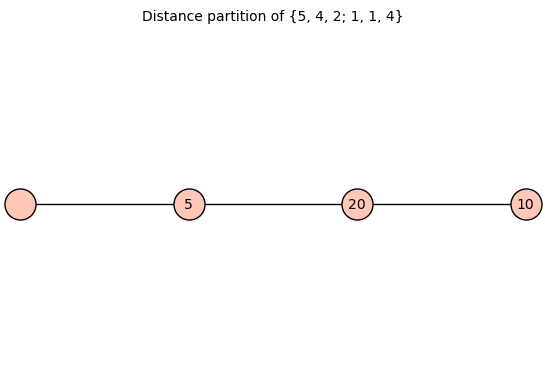

In [9]:
syl.distancePartition()

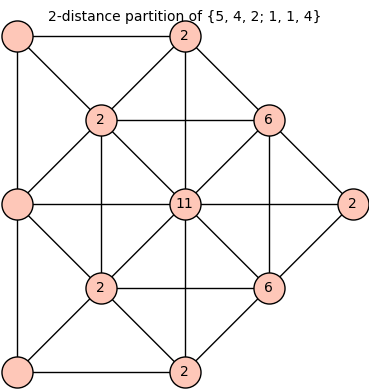

In [11]:
syl.distancePartition(2)

## Parameter computation: parameters with variables

Let us define a *one-parametric family* of *intersection arrays*.

In [15]:
r = var("r")
f = DRGParameters([2*r^2*(2*r+1), (2*r-1)*(2*r^2+r+1), 2*r^2], [1, 2*r^2, r*(4*r^2-1)])
f.order(factor=True)

(2*r + 1)^3*r

In [16]:
f1 = f.subs(r == 1)
f1

Parameters of a distance-regular graph with intersection array {6, 4, 2; 1, 2, 3}

The parameters of `f1` are known to ~~uniquely determine~~ the *Hamming scheme $H(3, 3)$*.

In [17]:
f2 = f.subs(r == 2)
f2

Parameters of a distance-regular graph with intersection array {40, 33, 8; 1, 8, 30}

## Feasibility checking

A parameter set is called **feasible** if it passes all known *existence conditions*.

Let us verify that *$H(3, 3)$* is feasible.

In [18]:
f1.check_feasible()

No error has occured, since all existence conditions are met.

Let us now check whether the second member of the family is feasible.

In [19]:
f2.check_feasible()

InfeasibleError: nonexistence by JurišićVidali12

In this case, ~~nonexistence~~ has been shown by *matching* the parameters against a list of **nonexistent families**.

## Triple intersection numbers

* In some cases, **triple intersection numbers** can be computed.
  **$$
  [h \ i \ j] = \begin{bmatrix} x & y & z \\ h & i & j \end{bmatrix} = |\{w \in X \mid w \ R_i \ x \land w \ R_j \ y \land w \ R_h \ z\}|
  $$**
* If **$x \ R_W \ y$**, **$x \ R_V \ z$** and **$y \ R_U \ z$**, then we have
  *$$
  \sum_{\ell=1}^D [\ell\ j\ h] = p^U_{jh} - [0\ j\ h], \qquad
  \sum_{\ell=1}^D [i\ \ell\ h] = p^V_{ih} - [i\ 0\ h], \qquad
  \sum_{\ell=1}^D [i\ j\ \ell] = p^W_{ij} - [i\ j\ 0],
  $$*
  where
  *$$
  [0\ j\ h] = \delta_{jW} \delta_{hV}, \qquad
  [i\ 0\ h] = \delta_{iW} \delta_{hU}, \qquad
  [i\ j\ 0] = \delta_{iV} \delta_{jU}.
  $$*
* Additionally, **$q^h_{ij} = 0$** ~~if and only if~~
  ~~$$
  \sum_{r,s,t=0}^D Q_{ri}Q_{sj}Q_{th} \begin{bmatrix} x & y & z \\ r & s & t \end{bmatrix} = 0
  $$~~
  for ~~all $x, y, z \in X$~~.

## Example: parameters for a bipartite DRG of diameter $5$

We will show that a distance-regular graph with intersection array **$\{55, 54, 50, 35, 10; 1, 5, 20, 45, 55\}$** ~~does not exist~~. The existence of such a graph would give a *counterexample* to a conjecture by MacLean and Terwilliger, see [Bipartite distance-regular graphs: The $Q$-polynomial property and pseudo primitive idempotents](http://dx.doi.org/10.1016/j.disc.2014.04.025) by M. Lang.

In [20]:
p = drg.DRGParameters([55, 54, 50, 35, 10], [1, 5, 20, 45, 55])
p.check_feasible(skip=["sporadic"])
p.order()

3500

In [21]:
p.kreinParameters()

0: [   1    0    0    0    0    0]
   [   0  132    0    0    0    0]
   [   0    0 1617    0    0    0]
   [   0    0    0 1617    0    0]
   [   0    0    0    0  132    0]
   [   0    0    0    0    0    1]

1: [     0      1      0      0      0      0]
   [     1   50/3  343/3      0      0      0]
   [     0  343/3 2450/3    686      0      0]
   [     0      0    686 2450/3  343/3      0]
   [     0      0      0  343/3   50/3      1]
   [     0      0      0      0      1      0]

2: [     0      0      1      0      0      0]
   [     0   28/3  200/3     56      0      0]
   [     1  200/3 2380/3    700     56      0]
   [     0     56    700 2380/3  200/3      1]
   [     0      0     56  200/3   28/3      0]
   [     0      0      0      1      0      0]

3: [     0      0      0      1      0      0]
   [     0      0     56  200/3   28/3      0]
   [     0     56    700 2380/3  200/3      1]
   [     1  200/3 2380/3    700     56      0]
   [     0   28/3  200/3     56      0      0]
   [     0      0      1      0      0      0]

4: [     0      0      0      0      1      0]
   [     0      0      0  343/3   50/3      1]
   [     0      0    686 2450/3  343/3      0]
   [     0  343/3 2450/3    686      0      0]
   [     1   50/3  343/3      0      0      0]
   [     0      1      0      0      0      0]

5: [   0    0    0    0    0    1]
   [   0    0    0    0  132    0]
   [   0    0    0 1617    0    0]
   [   0    0 1617    0    0    0]
   [   0  132    0    0    0    0]
   [   1    0    0    0    0    0]

We now compute the triple intersection numbers with respect to three vertices **$x, y, z$ at mutual distances $2$**. Note that we have ~~$p^2_{22} = 243$~~, so such triples must exist. The parameter **$\alpha$** will denote the number of vertices adjacent to all of *$x, y, z$*.

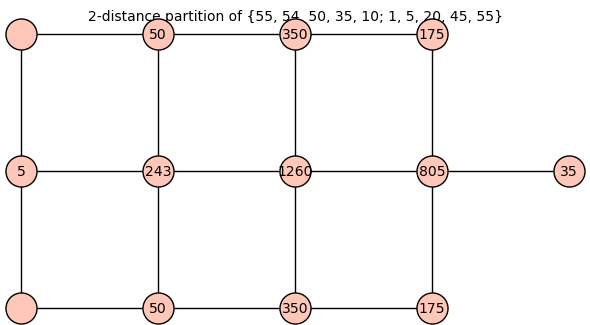

In [22]:
p.distancePartition(2)

In [23]:
S222 = p.tripleEquations(2, 2, 2, params={"alpha": (1, 1, 1)})
show(S222[1, 1, 1])
show(S222[5, 5, 5])

alpha

-12*alpha + 20

Let us consider the set **$A$** of **common neighbours of $x$ and $y$**, and the set **$B$** of vertices at **distance $2$ from both $x$ and $y$**. By the above, each vertex in *$B$* has ~~at most one neighbour~~ in *$A$*, so there are ~~at most $243$~~ edges between *$A$* and *$B$*. However, each vertex in *$A$* is adjacent to both *$x$* and *$y$*, and the other ~~$53$~~ neighbours are in *$B$*, amounting to a total of ~~$5 \cdot 53 = 265$~~ edges. We have arrived to a ~~contradiction~~, and we must conclude that a graph with intersection array *$\{55, 54, 50, 35, 10; 1, 5, 20, 45, 55\}$* ~~does not exist~~.

## Double counting

* Let **$x, y \in X$** with **$x \ R_r \ y$**.
* Let **$\alpha_1, \alpha_2, \dots \alpha_u$** and **$\kappa_1, \kappa_2, \dots \kappa_u$** be numbers such that there are precisely *$\kappa_\ell$* vertices **$z \in X$** with **$x \ R_s \ z \ R_t \ y$** such that
  **$$
  \begin{bmatrix} x & y & z \\ h & i & j \end{bmatrix} = \alpha_\ell \qquad (1 \le \ell \le u).
  $$**
* Let **$\beta_1, \beta_2, \dots \beta_v$** and **$\lambda_1, \lambda_2, \dots \lambda_v$** be numbers such that there are precisely *$\lambda_\ell$* vertices **$w \in X$** with **$x \ R_h \ w \ R_i \ y$** such that
  **$$
  \begin{bmatrix} w & x & y \\ j & s & t \end{bmatrix} = \beta_\ell \qquad (1 \le \ell \le v).
  $$**
* Double-counting pairs *$(w, z)$* with **$w \ R_j \ z$** gives
  ~~$$
  \sum_{\ell=1}^u \kappa_\ell \alpha_\ell = \sum_{\ell=1}^v \lambda_\ell \beta_\ell
  $$~~
* Special case: **$u = 1, \alpha_1 = 0$** implies ~~$v = 1, \beta_1 = 0$~~.

## Example: parameters for a $3$-class $Q$-polynomial scheme

~~Nonexistence~~ of some *$Q$-polynomial* association schemes has been proven by obtaining a *contradiction* in *double counting* with triple intersection numbers.

In [24]:
q225

Parameters of a Q-polynomial association scheme with Krein array {24, 20, 36/11; 1, 30/11, 24}

In [25]:
q225.check_quadruples()

InfeasibleError: found forbidden quadruple wxyz with d(w, x) = 2, d(w, y) = 2, d(w, z) = 2, d(x, y) = 3, d(x, z) = 3, d(y, z) = 3

*Integer linear programming* has been used to find solutions to multiple systems of *linear Diophantine equations*,
*eliminating* inconsistent solutions.

## More results

There is no *distance-regular graph* with intersection array
* ~~$\{83, 54, 21; 1, 6, 63\}$~~ (~~$1080$~~ vertices)
* ~~$\{135, 128, 16; 1, 16, 120\}$~~ (~~$1360$~~ vertices)
* ~~$\{104, 70, 25; 1, 7, 80\}$~~ (~~$1470$~~ vertices)
* ~~$\{234, 165, 12; 1, 30, 198\}$~~ (~~$1600$~~ vertices)
* ~~$\{195, 160, 28; 1, 20, 168\}$~~ (~~$2016$~~ vertices)
* ~~$\{125, 108, 24; 1, 9, 75\}$~~ (~~$2106$~~ vertices)
* ~~$\{126, 90, 10; 1, 6, 105\}$~~ (~~$2197$~~ vertices)
* ~~$\{203, 160, 34; 1, 16, 170\}$~~ (~~$2640$~~ vertices)
* ~~$\{53, 40, 28, 16; 1, 4, 10, 28\}$~~ (~~$2916$~~ vertices)

~~Nonexistence~~ of *$Q$-polynomial association schemes* [GVW21] with parameters listed as *feasible* by [Williford](http://www.uwyo.edu/jwilliford/) has been shown for
* ~~$29$~~ cases of *$3$-class primitive* $Q$-polynomial association schemes
  - *double counting* has been used in ~~two~~ cases
* ~~$92$~~ cases of *$4$-class $Q$-bipartite* $Q$-polynomial association schemes
* ~~$11$~~ cases of *$5$-class $Q$-bipartite* $Q$-polynomial association schemes


## Nonexistence of infinite families

Association schemes with the following parameters do not exist.

* *distance-regular graphs* with *intersection arrays* ~~$\{(2r+1)(4r+1)(4t-1), 8r(4rt-r+2t), (r+t)(4r+1); 1, (r+t)(4r+1), 4r(2r+1)(4t-1)\}$~~ (**$r, t \ge 1$**)
* *primitive $Q$-polynomial association schemes* with *Krein arrays* ~~$\{2r^2-1, 2r^2-2, r^2+1; 1, 2, r^2-1\}$~~ (**$r \ge 3$ odd**)
* *$Q$-bipartite $Q$-polynomial association schemes* with *Krein arrays* ~~$\left\{m, m-1, {m(r^2-1) \over r^2}, m-r^2+1; 1, {m \over r^2}, r^2-1, m\right\}$~~ (**$m, r \ge 3$ odd**)
* *$Q$-bipartite $Q$-polynomial association schemes* with *Krein arrays* ~~$\left\{{r^2+1 \over 2}, {r^2-1 \over 2}, {(r^2+1)^2 \over 2r(r+1)},
    {(r-1)(r^2+1) \over 4r}, {r^2+1 \over 2r};
    1, {(r-1)(r^2+1) \over 2r(r+1)}, {(r+1)(r^2 + 1) \over 4r},
    {(r-1)(r^2+1) \over 2r}, {r^2+1 \over 2}\right\}$~~ (**$r \ge 5$**, **$r \equiv 3 \pmod{4}$**)
* *$Q$-antipodal $Q$-polynomial association schemes* with *Krein arrays* ~~$\left\{r^2 - 4, r^2 - 9, \frac{12(s-1)}{s}, 1; 1, \frac{12}{s}, r^2 - 9, r^2 - 4\right\}$~~ (**$r \ge 5$**, **$s \ge 4$**)
  - **Corollary**: a *tight $4$-design* in **$H((9a^2+1)/5,6)$** ~~does not exist~~ [GSV20].

## Using Schönberg's theorem

* **Schönberg's theorem**: A *polynomial* **$f: [-1, 1] \to \mathbb{R}$** of degree **$D$** is ~~positive definite on $S^{m-1}$~~ iff it is a ~~nonnegative linear combination~~ of *Gegenbauer polynomials* **$Q^m_{\ell}$** (**$0 \le \ell \le D$**).
* **Theorem** (*Kodalen, Martin*): If **$(X, \mathcal{R})$** is an *association scheme*, then
  ~~$$
  Q_{\ell}^{m_i} \left({1 \over m_i} L^*_i \right) = {1 \over |X|} \sum_{j=0}^D \theta_{\ell j} L^*_j
  $$~~
  for some ~~nonnegative constants~~ **$\theta_{\ell j}$** (**$0 \le j \le D$**), where **$m_i = \operatorname{rank}(E_i)$** and **$L^*_i = (q^h_{ij})_{h,j=0}^D$**.

In [26]:
q594 = drg.QPolyParameters([9, 8, 81/11, 63/8], [1, 18/11, 9/8, 9])
q594.order()

594

In [27]:
q594.check_schoenberg()

InfeasibleError: Gegenbauer polynomial 4 on L*[1] not nonnegative: nonexistence by Kodalen19, Corollary 3.8.

## The Terwilliger polynomial

* *Terwilliger* has observed that for a *$Q$-polynomial distance-regular graph $\Gamma$*, there exists a ~~polynomial $T$ of degree $4$~~ whose coefficients can be expressed in terms of the *intersection numbers* of *$\Gamma$* such that ~~$T(\theta) \ge 0$~~ for each *non-principal eigenvalue* **$\theta$** of the **local graph** at a vertex of *$\Gamma$*.
* `sage-drg` can be used to *compute* this polynomial.

In [28]:
p750 = drg.DRGParameters([49, 40, 22], [1, 5, 28])
p750.order()

750

In [29]:
T750 = p750.terwilligerPolynomial()
T750

-18*x^4 + 42*x^3 + 366*x^2 - 506*x - 1452

In [30]:
sorted(s.rhs() for s in solve(T750 == 0, x))

[-11/3, -1/6*sqrt(345) + 3/2, 3, 1/6*sqrt(345) + 3/2]

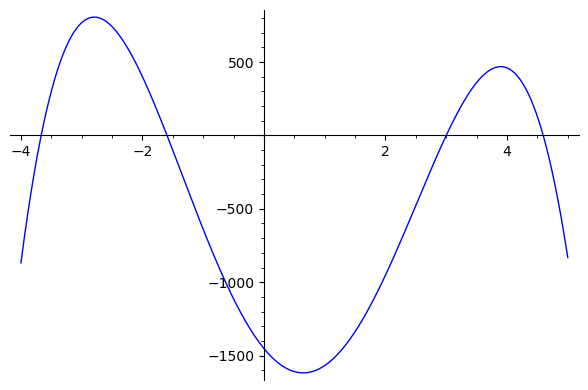

In [31]:
plot(T750, (x, -4, 5))

We may now use **[BCN, Thm. 4.4.4]** to further *restrict* the possible *non-principal eigenvalues* of the *local graphs*.

In [32]:
l, u = -1 - p750.b[1] / (p750.theta[1] + 1), -1 - p750.b[1] / (p750.theta[3] + 1)
l, u

(-11/3, 3)

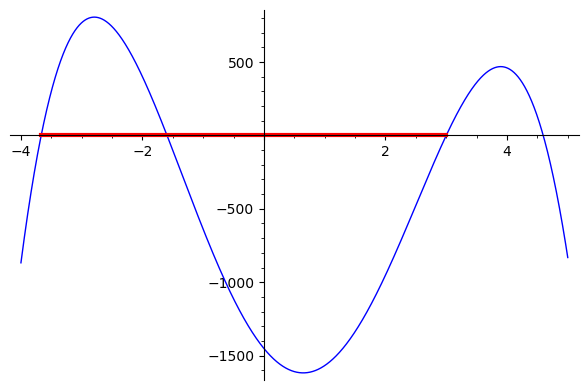

In [33]:
plot(T750, (x, -4, 5)) + line([(l, 0), (u, 0)], color="red", thickness=3)

Since graph eigenvalues are *algebraic integers* and all *non-integral eigenvalues* of the *local graph* lie on a subinterval of ~~$(-4, -1)$~~, it can be shown that the only permissible *non-principal eigenvalues* are ~~$-3, -2, 3$~~.

We may now set up a *system of equations* to determine the *multiplicities*.

In [34]:
var("m1 m2 m3")
solve([1 + m1 + m2 + m3 == p750.k[1],
       1 * p750.a[1] + m1 * 3 + m2 * (-2) + m3 * (-3) == 0,
       1 * p750.a[1]^2 + m1 * 3^2 + m2 * (-2)^2 + m3 * (-3)^2 == p750.k[1] * p750.a[1]],
      (m1, m2, m3))

[[m1 == (96/5), m2 == (104/5), m3 == 8]]

Since all multiplicities are not *nonnegative integers*, we conclude that there is no *distance-regular graph* with intersection array
* ~~$\{49, 40, 22; 1, 5, 28\}$~~ (~~$750$~~ vertices)
* ~~$\{109, 80, 22; 1, 10, 88\}$~~ (~~$1200$~~ vertices)
* ~~$\{164, 121, 33; 1, 11, 132\}$~~ (~~$2420$~~ vertices)

## Distance-regular graphs with classical parameters

We use a similar technique to prove ~~nonexistence~~ of certain *distance-regular graphs* with *classical parameters* **$(D, b, \alpha, \beta)$**:
* ~~$(3, 2, 2, 9)$~~ (~~$430$~~ vertices)
* ~~$(3, 2, 5, 21)$~~ (~~$1100$~~ vertices)
* ~~$(6, 2, 2, 107)$~~ (~~$87\,725\,820\,468$~~ vertices)
* ~~$(b, \alpha) = (2, 1)$~~ and
  - ~~$D = 4$~~, ~~$\beta \in \{8, 10, 12\}$~~
  - ~~$D = 5$~~, ~~$\beta \in \{16, 17, 19, 20, 21, 28\}$~~
  - ~~$D = 6$~~, ~~$\beta \in \{32, 33, 34, 35, 36, 38, 40, 46, 49, 54, 60\}$~~
  - ~~$D = 7$~~, ~~$\beta \in \{64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 77, 79, 81, 84, 85, 92, 99, 124\}$~~
  - ~~$D = 8$~~, ~~$\beta \in \{128, 129, 130, 131, 133, 134, 135, 136, 137, 139, 140, 141, 151, 152, 155, 158, 160, 165, 168, 174, 175, 183, 184, 190, 202, 238, 252\}$~~
  - ~~$D \ge 3$~~, ~~$\beta \in \{2^{D-1}, 2^D-4\}$~~

## Local graphs with at most four eigenvalues

* **Lemma** (*Van Dam*): A *connected graph* on **$n$** vertices with *spectrum*
  **$$
  {\theta_0}^{\ell_0} \quad
  {\theta_1}^{\ell_1} \quad
  {\theta_2}^{\ell_2} \quad
  {\theta_3}^{\ell_3}
  $$**
  is ~~walk-regular~~ with precisely
  ~~$$
  w_r = {1 \over n} \sum_{i=0}^3 \ell_i \cdot {(\theta_i)}^r
  $$~~
  *closed $r$-walks* (**$r \ge 3$**) through *each vertex*.
  - If **$r$** is *odd*, **$w_r$** must be ~~even~~.
* A *distance-regular graph* **$\Gamma$** with *classical parameters* **$(D, 2, 1, \beta)$** has *local graphs* with
  - precisely **three distinct eigenvalues** if **$\beta = 2^D - 1$**, and then *$\Gamma$* is a ~~bilinear forms graph~~ (Gavrilyuk, Koolen)
  - precisely **four distinct eigenvalues** if **$(\beta+1) \mid (2^D-2)(2^D-1)$**, and then ~~$\beta = 2^D-2$~~ (or *$w_3$* is ~~nonintegral~~)
* There is no *distance-regular graph* with *classical parameters* **$(D, 2, 1, \beta)$** such that
  - ~~$(D, \beta) \in \{(3, 5), (4, 9), (4, 13), (5, 29), (6, 41), (6, 61), (7, 125), (8, 169), (8, 253)\}$~~
  - ~~$D \ge 3$~~ and ~~$\beta = 2^D - 3$~~

## Addendum: feasible negative type classical DRG parameters (Weng)

In [48]:
pp = drg.DRGParameters(4, -3, -2, -41)
TT = pp.terwilligerPolynomial()
TT.factor()

810*(x + 40)*(x + 1)*(x - 2)*(x - 41)

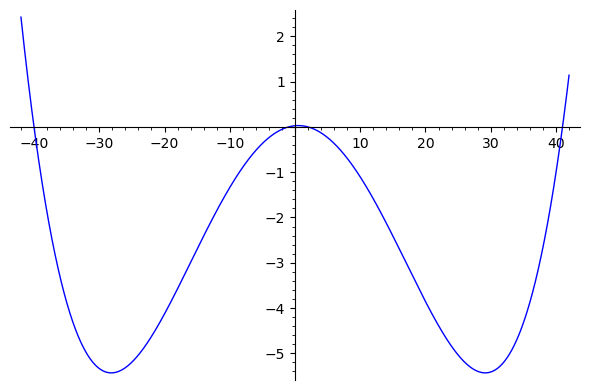

In [51]:
plot(TT, (x, -42, 42))

In [50]:
pp.check_feasible()